In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [5]:
# assign the collection to a variable
establishments = db['establishments']

In [7]:
# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}

# Use count_documents to display the number of documents in the result
print(establishments.count_documents(query))

# Display the first document in the results using pprint
data = establishments.find(query)
pprint(data[0])

41
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': 102,
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': 0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('65b1680fd5f89c14ff391464'),
 'geocode': {'latitude': Decimal128('50.769705'),
             'longitude': Decimal128('0.27694')},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}],
 'meta': {

In [8]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first 10 rows of the DataFrame
df.head()

(41, 28)


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,65b1680fd5f89c14ff391464,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,65b1680fd5f89c14ff3917e5,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,65b1680fd5f89c14ff391aef,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,65b1680fd5f89c14ff391cdd,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,65b1680fd5f89c14ff391cec,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."


In [9]:
# Display the number of rows in the DataFrame
print(df.shape)

(41, 28)


In [10]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query = {"RatingValue": {"$gte": 4},
        "LocalAuthorityName": {"$regex": "London"}}

# Use count_documents to display the number of documents in the result
print(establishments.count_documents(query))

# Display the first document in the results using pprint
data = establishments.find(query)
pprint(data[0])

33
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': 508,
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('65b1680fd5f89c14ff392e7f'),
 'geocode': {'latitude': Decimal128('51.369321'),
             'longitude': Decimal128('0.508551')},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establish

In [11]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(data)


# Display the first 10 rows of the DataFrame
df.head()

(33, 28)


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,65b1680fd5f89c14ff392e7f,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,65b1680fd5f89c14ff3931a5,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,65b1680fd5f89c14ff393cf2,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,65b1680fd5f89c14ff394af2,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,65b1680fd5f89c14ff394af3,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


In [12]:
# Display the number of rows in the DataFrame
print(df.shape)

(33, 28)


In [13]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.49014200
longitude = 0.08384000

query = {"geocode.latitude": {"$gte": latitude - degree_search,
                             "$lte": latitude + degree_search},
         "geocode.longitude": {"$gte": longitude - degree_search,
                             "$lte": longitude + degree_search},
         "RatingValue": 5
        }

sort =  [("scores.Hygiene", 1)]
limit = 5

# Print the results
data = list(establishments.find(query).sort(sort).limit(limit))
pprint(data)

[{'AddressLine1': '130 - 132 Plumstead High Street',
  'AddressLine2': '',
  'AddressLine3': 'Plumstead',
  'AddressLine4': 'Greenwich',
  'BusinessName': 'Volunteer',
  'BusinessType': 'Pub/bar/nightclub',
  'BusinessTypeID': 7843,
  'ChangesByServerID': 0,
  'Distance': 4646.965634598608,
  'FHRSID': 694609,
  'LocalAuthorityBusinessID': 'PI/000116619',
  'LocalAuthorityCode': 511,
  'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
  'LocalAuthorityName': 'Greenwich',
  'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'SE18 1JQ',
  'RatingDate': '2019-08-05T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': 5,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('65b1680fd5f89c14ff396cc3'),
  'geocode': {'latitude': Decimal128('51.4873437'),
              'longitude': Decimal128('0.09208')},
  'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/694609',
             're

In [14]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first 10 rows of the DataFrame
df.head()

(5, 28)


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,65b1680fd5f89c14ff396cc3,694609,0,PI/000116619,Volunteer,Pub/bar/nightclub,7843,130 - 132 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.09208, 'latitude': 51.4873437}",,4646.965635,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,65b1680fd5f89c14ff396cdb,695241,0,PI/000179088,Plumstead Manor Nursery,Caring Premises,5,Plumstead Manor School Old Mill Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0859939977526665, 'latitude': ...",,4646.974010,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,65b1680fd5f89c14ff396cde,694478,0,PI/000086506,Atlantic Fish Bar,Takeaway/sandwich shop,7844,35 Lakedale Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0912164, 'latitude': 51.4867296}",,4646.974612,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,65b1680fd5f89c14ff396c96,695223,0,PI/000178842,Iceland,Retailers - supermarkets/hypermarkets,7840,144 - 146 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0924199968576431, 'latitude': ...",,4646.946071,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,65b1680fd5f89c14ff396ca6,1380578,0,14425,Howe and Co Fish and Chips - Van 17,Mobile caterer,7846,Restaurant And Premises 107A Plumstead High St...,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0925370007753372, 'latitude': ...",,4646.955931,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


In [15]:
# Display the number of rows in the DataFrame
print(df.shape)

(5, 28)


In [16]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest

# Print the number of documents in the result

# Print the first 10 results

match_query = {'$match': {'scores.Hygiene': 0}}
group_query = {'$group': {'_id': "$LocalAuthorityName", 'count': { '$sum': 1 }}}
sort_values = {'$sort': { 'count': -1}}

# Put the pipeline together
pipeline = [match_query, group_query, sort_values]

# execute
results = list(establishments.aggregate(pipeline))

pprint(results[0:10])

[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [17]:
# Convert the result to a Pandas DataFrame

# Display the number of rows in the DataFrame

# Display the first 10 rows of the DataFrame
df = pd.DataFrame(results)
df.head(10)

,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


In [18]:
import matplotlib.pyplot as plt

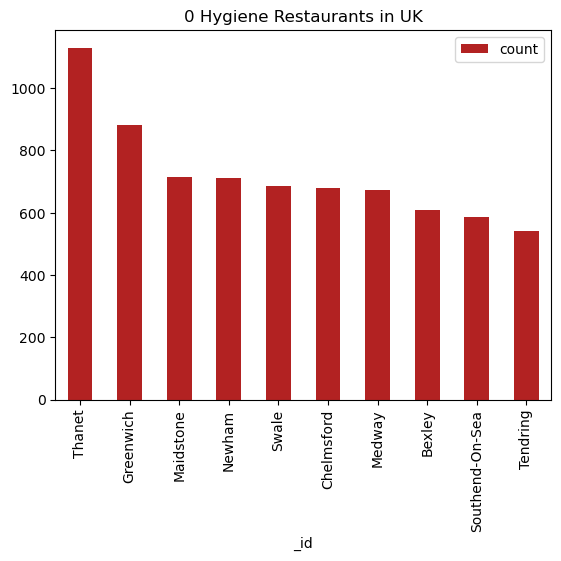

In [19]:
df.head(10).plot(kind="bar", x="_id", y="count", color="firebrick", title="0 Hygiene Restaurants in UK")
plt.show()